In [1]:
# Import modules:
import gmsh
import sys
import numpy as np

In [2]:
# Simple 2d geometry, extruded along the z axis:
#          D----C
#         /     |
#  F-----E      |
#  |            |
#  A------------B
h = 8
x_down = 15
x_slope = 10
x_up = 15
y_down = 10
y_slope = 10
z = 5

In [3]:
# Initialize gmsh:
gmsh.initialize()

# Points:
A = gmsh.model.geo.add_point(x=0, y=0, z=0, meshSize=h)
B = gmsh.model.geo.add_point(x=x_down+x_slope+x_up, y=0, z=0, meshSize=h)
C = gmsh.model.geo.add_point(x=x_down+x_slope+x_up, y=y_down+y_slope, z=0, meshSize=h)
D = gmsh.model.geo.add_point(x=x_down+x_slope, y=y_down+y_slope, z=0, meshSize=h/2)
E = gmsh.model.geo.add_point(x=x_down, y=y_down, z=0, meshSize=h/2)
F = gmsh.model.geo.add_point(x=0, y=y_down, z=0, meshSize=h)

# Line segments:
AB = gmsh.model.geo.add_line(A, B)
BC = gmsh.model.geo.add_line(B, C)
CD = gmsh.model.geo.add_line(C, D)
DE = gmsh.model.geo.add_line(D, E)
EF = gmsh.model.geo.add_line(E, F)
FA = gmsh.model.geo.add_line(F, A)

# Closed curves:
boundary = gmsh.model.geo.add_curve_loop([AB, BC, CD, DE, EF, FA])

# Surfaces inside closed curves:
surface = gmsh.model.geo.add_plane_surface([boundary])

# 2d -> 3d (extrute surface along the z axis):
gmsh.model.geo.extrude([(2, surface)], 0, 0, 5)

# Synchronize and generate mesh:
gmsh.model.geo.remove_all_duplicates()
gmsh.model.geo.synchronize()
gmsh.model.mesh.generate()
gmsh.model.mesh.remove_duplicate_nodes()
gmsh.model.mesh.remove_duplicate_elements()

# Write mesh data to file:
# gmsh.write("GFG.msh")

# Create graphical user interface
# if 'close' not in sys.argv:
#     gmsh.fltk.run()

# Get node coordinates:
nodeTags, nodeCoords, nodeParams = gmsh.model.mesh.getNodes()

# Get (triangular) faces:
faceTypes, faceTags, faceNodeTags = gmsh.model.mesh.getElements(dim=2)

# Get (tetrahedral) elements:
elemTypes, elemTags, elemNodeTags = gmsh.model.mesh.getElements(dim=3)

# Finalize the Gmsh API
gmsh.finalize()

1
Info    : Meshing 1D...
Info    : [  0%] Meshing curve 1 (Line)
Info    : [ 10%] Meshing curve 2 (Line)
Info    : [ 20%] Meshing curve 3 (Line)
Info    : [ 20%] Meshing curve 4 (Line)
Info    : [ 30%] Meshing curve 5 (Line)
Info    : [ 30%] Meshing curve 6 (Line)
Info    : [ 40%] Meshing curve 8 (Line)
Info    : [ 40%] Meshing curve 9 (Line)
Info    : [ 50%] Meshing curve 10 (Line)
Info    : [ 60%] Meshing curve 11 (Line)
Info    : [ 60%] Meshing curve 12 (Line)
Info    : [ 70%] Meshing curve 13 (Line)
Info    : [ 70%] Meshing curve 15 (Line)
Info    : [ 80%] Meshing curve 16 (Line)
Info    : [ 80%] Meshing curve 20 (Line)
Info    : [ 90%] Meshing curve 24 (Line)
Info    : [ 90%] Meshing curve 28 (Line)
Info    : [100%] Meshing curve 32 (Line)
Info    : Done meshing 1D (Wall 0.00652059s, CPU 0.007321s)
Info    : Meshing 2D...
Info    : [  0%] Meshing surface 1 (Plane, Frontal-Delaunay)
Info    : [ 20%] Meshing surface 17 (Surface, Frontal-Delaunay)
Info    : [ 30%] Meshing surface 21

In [4]:
# Extract X-, Y-, and Z- coordinates of all nodes from GMSH outputs:
node = np.array(nodeCoords)
node_X = node[0::3]
node_Y = node[1::3]
node_Z = node[2::3]
print(node.reshape((-1, 3)))

[[ 0.          0.          0.        ]
 [40.          0.          0.        ]
 [40.         20.          0.        ]
 [25.         20.          0.        ]
 [15.         10.          0.        ]
 [ 0.         10.          0.        ]
 [ 0.          0.          5.        ]
 [40.          0.          5.        ]
 [40.         20.          5.        ]
 [25.         20.          5.        ]
 [15.         10.          5.        ]
 [ 0.         10.          5.        ]
 [ 8.          0.          0.        ]
 [16.          0.          0.        ]
 [24.          0.          0.        ]
 [32.          0.          0.        ]
 [40.          6.66666667  0.        ]
 [40.         13.33333333  0.        ]
 [33.81101698 20.          0.        ]
 [28.89881608 20.          0.        ]
 [22.5        17.5         0.        ]
 [20.         15.          0.        ]
 [17.5        12.5         0.        ]
 [11.10118392 10.          0.        ]
 [ 6.18898302 10.          0.        ]
 [ 0.          5.        

In [5]:
# All (tetrahedral) elements:
elem = elemNodeTags[0].reshape(-1,4)
elem = elem-1 # indexing from 0
print(elem)

[[81 73 48 42]
 [73 87 81 48]
 [74 72 90 51]
 [81 48 49 42]
 [87 70 43 48]
 [71 81 90 42]
 [87 43 49 48]
 [87 49 81 48]
 [51 83 90 74]
 [73 81 71 42]
 [40 87 73 48]
 [90 71 42 51]
 [70 82 87 43]
 [43 87 49 82]
 [74 75 44 41]
 [96 90 81 42]
 [70 87 40 48]
 [51 83 74 44]
 [43 68 82 53]
 [71 90 72 51]
 [47 44 41 83]
 [88 87 82 49]
 [54 50 89 63]
 [82 70 68 43]
 [58  0 12 63]
 [97 26  6 63]
 [49 87 81 88]
 [90 42 57 51]
 [45 60 91 52]
 [52 60 91 14]
 [72 75 22 51]
 [81 49 96 42]
 [54 89 93 63]
 [21 71 72 51]
 [35 90 72 71]
 [84 28 60 29]
 [14 45 60 15]
 [62 55 94 52]
 [89 50 12 63]
 [60 91 84 45]
 [35 81 90 71]
 [71 21 42 51]
 [60 28 91 14]
 [96 90 42 57]
 [28 91 84 60]
 [52 45 60 14]
 [92 82 68 53]
 [82 43 53 59]
 [49 43 82 59]
 [91 62 94 52]
 [26 93 89 63]
 [50 54 12 63]
 [12 64 13 47]
 [64 26 27 86]
 [54 58 12 63]
 [93 26 97 63]
 [34 87 81 73]
 [73 20 48 42]
 [25 93 39 80]
 [79 25 93 39]
 [70 68 43 19]
 [70 33 82 68]
 [91 51 83 90]
 [66 85 31 17]
 [30 85 66 16]
 [74 72 36 90]
 [29 95  7

In [6]:
# All (triangular) faces on the boundary:
face = faceNodeTags[0].reshape(-1,3)
face = face-1 # indexing from 0
print(face)

[[ 0 12 58]
 [25  0 58]
 [15  1 56]
 [ 1 16 56]
 [17  2 53]
 [ 2 18 53]
 [19  3 48]
 [ 3 20 48]
 [22  4 44]
 [ 4 23 47]
 [44  4 47]
 [24  5 54]
 [ 5 25 54]
 [12 13 47]
 [12 47 50]
 [12 50 54]
 [12 54 58]
 [13 14 55]
 [47 13 55]
 [14 15 45]
 [14 45 52]
 [14 52 55]
 [45 15 56]
 [16 17 46]
 [16 46 56]
 [46 17 53]
 [18 19 43]
 [18 43 53]
 [43 19 48]
 [20 21 42]
 [20 42 48]
 [21 22 51]
 [42 21 51]
 [22 44 51]
 [23 24 50]
 [47 23 50]
 [50 24 54]
 [54 25 58]
 [48 42 49]
 [49 42 57]
 [42 51 57]
 [43 48 49]
 [43 49 59]
 [53 43 59]
 [44 47 55]
 [51 44 52]
 [52 44 55]
 [46 45 56]
 [45 46 59]
 [45 49 57]
 [49 45 59]
 [52 45 57]
 [46 53 59]
 [51 52 57]
 [ 0 63  6]
 [12 63  0]
 [ 7 61  1]
 [ 1 61 15]
 [ 6 63 26]
 [29 61  7]
 [13 64 12]
 [26 63 12]
 [12 64 26]
 [14 62 13]
 [13 62 27]
 [27 64 13]
 [15 60 14]
 [14 60 28]
 [28 62 14]
 [29 60 15]
 [15 61 29]
 [26 64 27]
 [27 62 28]
 [28 60 29]
 [ 1 67  7]
 [16 67  1]
 [ 8 65  2]
 [ 2 65 17]
 [ 7 67 30]
 [31 65  8]
 [17 66 16]
 [16 66 30]
 [30 67 16]
 [17

In [7]:
# %matplotlib --list

In [8]:
# %matplotlib qt

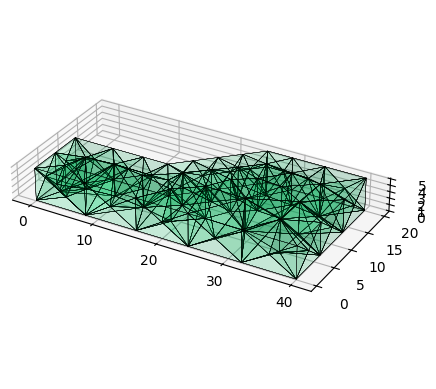

In [9]:
import matplotlib.pyplot as plt

plt.figure()
ax = plt.axes(projection='3d')
for i in range(4):
    triangles = np.delete(elem,i,axis=1)
    ax.plot_trisurf(node_X, node_Y, node_Z, triangles=triangles, linewidths=0.2, edgecolor='k', color=[0, 1.0, 0.5, 0.05])
ax.plot_trisurf(node_X, node_Y, node_Z, triangles=face, linewidths=0.2, edgecolor='k', color=[0, 1.0, 0.5, 0.05])
ax.set_aspect('equal')
plt.show()